### URL 접속

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("/home/koo4802/dev_ws/eda/driver/chromedriver"))
driver.set_window_size(1400, 1080)

for _ in range(2):
    driver.get(url)
    time.sleep(1)

### 정보 추출(유종을 한개만 선택했을 때)

In [31]:
a_list = driver.find_element(By.ID, "body2").find_elements(By.CLASS_NAME, "rlist")
for a in a_list:
    a.click()
    time.sleep(0.3)
    mini_window = driver.find_element(By.ID, "os_dtail_info")
    firm_title = mini_window.find_element(By.ID, "poll_div_nm").text
    gas_title = mini_window.find_element(By.ID, "os_nm").text
    address = mini_window.find_element(By.ID, "rd_addr").text
    cost_info = mini_window.find_element(By.ID, "infoTbody").text
    gas_info = {
        "상표": firm_title,
        "주유소명": gas_title,
        "주소": address,
        "유종별 가격": {},
        "부가정보": {}
    }
    lines = cost_info.split("\n")
    gas_price = {}
    for line in lines:
        gas_price[line.split(" ")[0]] = line.split(" ")[1]
    gas_info["유종별 가격"] = gas_price
    print(gas_info)
    time.sleep(1)

{'상표': 'GS칼텍스', '주유소명': 'CJ대한통운㈜ 신림주유소', '주소': '서울 관악구 남부순환로 1515 (신림동)', '유종별 가격': {'고급휘발유': '2,099원', '보통휘발유': '1,948원', '경유': '1,778원'}}
{'상표': 'GS칼텍스', '주유소명': '서일석유(주)락성주유소', '주소': '서울 관악구 남부순환로 1920 (봉천동)', '유종별 가격': {'고급휘발유': '1,895원', '보통휘발유': '1,695원', '경유': '1,595원', '실내등유': '1,380원'}}
{'상표': 'SK에너지', '주유소명': 'SK에너지(주)직영 신봉천주유소', '주소': '서울 관악구 남부순환로 1880 (봉천동)', '유종별 가격': {'고급휘발유': '1,905원', '보통휘발유': '1,745원', '경유': '1,625원', '실내등유': '1,380원'}}
{'상표': 'SK에너지', '주유소명': '(주)한유에너지 행운주유소', '주소': '서울 관악구 남부순환로 1883 (봉천동)', '유종별 가격': {'고급휘발유': '1,994원', '보통휘발유': '1,694원', '경유': '1,594원'}}
{'상표': 'HD현대오일뱅크', '주유소명': 'HD현대오일뱅크㈜직영 관악셀프주유소', '주소': '서울 관악구 남부순환로 1520 (신림동)', '유종별 가격': {'고급휘발유': '2,029원', '보통휘발유': '1,769원', '경유': '1,628원'}}
{'상표': 'GS칼텍스', '주유소명': 'CJ대한통운㈜ 신림주유소', '주소': '서울 관악구 남부순환로 1515 (신림동)', '유종별 가격': {'고급휘발유': '2,099원', '보통휘발유': '1,948원', '경유': '1,778원'}}


### 부가 정보 추출(유종을 한 개만 출력했을 때)

In [32]:
detail_ids = ["cwsh_yn", "lpg_yn", "maint_yn", "cvs_yn", "sel24_yn"]
detail_keys = ["세차장 여부", "충전소 여부", "경정비 여부", "편의점 여부", "24시 영업 여부"]
detail_info = {}
for idx, id in enumerate(detail_ids):
    src_value = driver.find_element(By.ID, id).get_attribute("src")
    if "off" in src_value:
        detail_info[detail_keys[idx]] = "N"
    else:
        detail_info[detail_keys[idx]] = "Y"
print(detail_info)

{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', '편의점 여부': 'N', '24시 영업 여부': 'N'}


### 한 유종에 대해서 정보 추출하는 함수(정보 추출 부분을 더함)

In [6]:
def get_gas_info(body_id):
    a_list = driver.find_element(By.ID, body_id).find_elements(By.TAG_NAME, "a")
    gas_info_list = []
    for a in a_list:
        a.click()
        time.sleep(1)
        mini_window = WebDriverWait(driver, 30).until(
                    EC.presence_of_element_located((By.ID, "os_dtail_info"))
                )
        firm_title = mini_window.find_element(By.ID, "poll_div_nm").text
        gas_title = mini_window.find_element(By.ID, "os_nm").text
        address = mini_window.find_element(By.ID, "rd_addr").text
        cost_info = mini_window.find_element(By.ID, "infoTbody").text
        gas_info = {
            "상표": firm_title,
            "주유소명": gas_title,
            "주소": address,
            "유종별 가격": {},
            "부가정보": {}
        }
        lines = cost_info.split("\n")
        gas_price = {}
        for line in lines:
            gas_price[line.split(" ")[0]] = line.split(" ")[1]
        gas_info["유종별 가격"] = gas_price
        time.sleep(1)
        detail_ids = ["cwsh_yn", "lpg_yn", "maint_yn", "cvs_yn", "sel24_yn"]
        detail_keys = ["세차장 여부", "충전소 여부", "경정비 여부", "편의점 여부", "24시 영업 여부"]
        detail_info = {}
        for idx, id in enumerate(detail_ids):
            src_value = driver.find_element(By.ID, id).get_attribute("src")
            if "off" in src_value:
                detail_info[detail_keys[idx]] = "N"
            else:
                detail_info[detail_keys[idx]] = "Y"
        gas_info["부가정보"] = detail_info
        gas_info_list.append(gas_info)
    return gas_info_list


In [7]:
gas_info_list = []
gas_info_list.append(get_gas_info("body1"))

In [8]:
len(gas_info_list[0])

14

In [14]:
gas_info_list[0]

[{'상표': 'HD현대오일뱅크',
  '주유소명': '㈜CW창원',
  '주소': '서울 관악구 과천대로 921 (남현동)',
  '유종별 가격': {'고급휘발유': '1,885원', '보통휘발유': '1,638원', '경유': '1,513원'},
  '부가정보': {'세차장 여부': 'Y',
   '충전소 여부': 'N',
   '경정비 여부': 'Y',
   '편의점 여부': 'N',
   '24시 영업 여부': 'N'}},
 {'상표': 'HD현대오일뱅크',
  '주유소명': 'HD현대오일뱅크㈜직영 문성골주유소',
  '주소': '서울 관악구 문성로 97',
  '유종별 가격': {'보통휘발유': '1,659원', '경유': '1,544원', '실내등유': '1,399원'},
  '부가정보': {'세차장 여부': 'Y',
   '충전소 여부': 'N',
   '경정비 여부': 'N',
   '편의점 여부': 'N',
   '24시 영업 여부': 'N'}},
 {'상표': 'HD현대오일뱅크',
  '주유소명': '진우7주유소 ㈜준우에너지',
  '주소': '서울 관악구 보라매로 41',
  '유종별 가격': {'보통휘발유': '1,684원', '경유': '1,564원'},
  '부가정보': {'세차장 여부': 'N',
   '충전소 여부': 'N',
   '경정비 여부': 'N',
   '편의점 여부': 'N',
   '24시 영업 여부': 'N'}},
 {'상표': '알뜰주유소',
  '주유소명': '(주)연우에너지 신관주유소',
  '주소': '서울 관악구 신림로 290 (신림동)',
  '유종별 가격': {'보통휘발유': '1,684원', '경유': '1,564원', '실내등유': '1,400원'},
  '부가정보': {'세차장 여부': 'Y',
   '충전소 여부': 'N',
   '경정비 여부': 'N',
   '편의점 여부': 'N',
   '24시 영업 여부': 'N'}},
 {'상표': 'SK에너지',
  '주유소명': '(주)한유에너지 행

### 14개 전부 잘 작동(스크린샷)

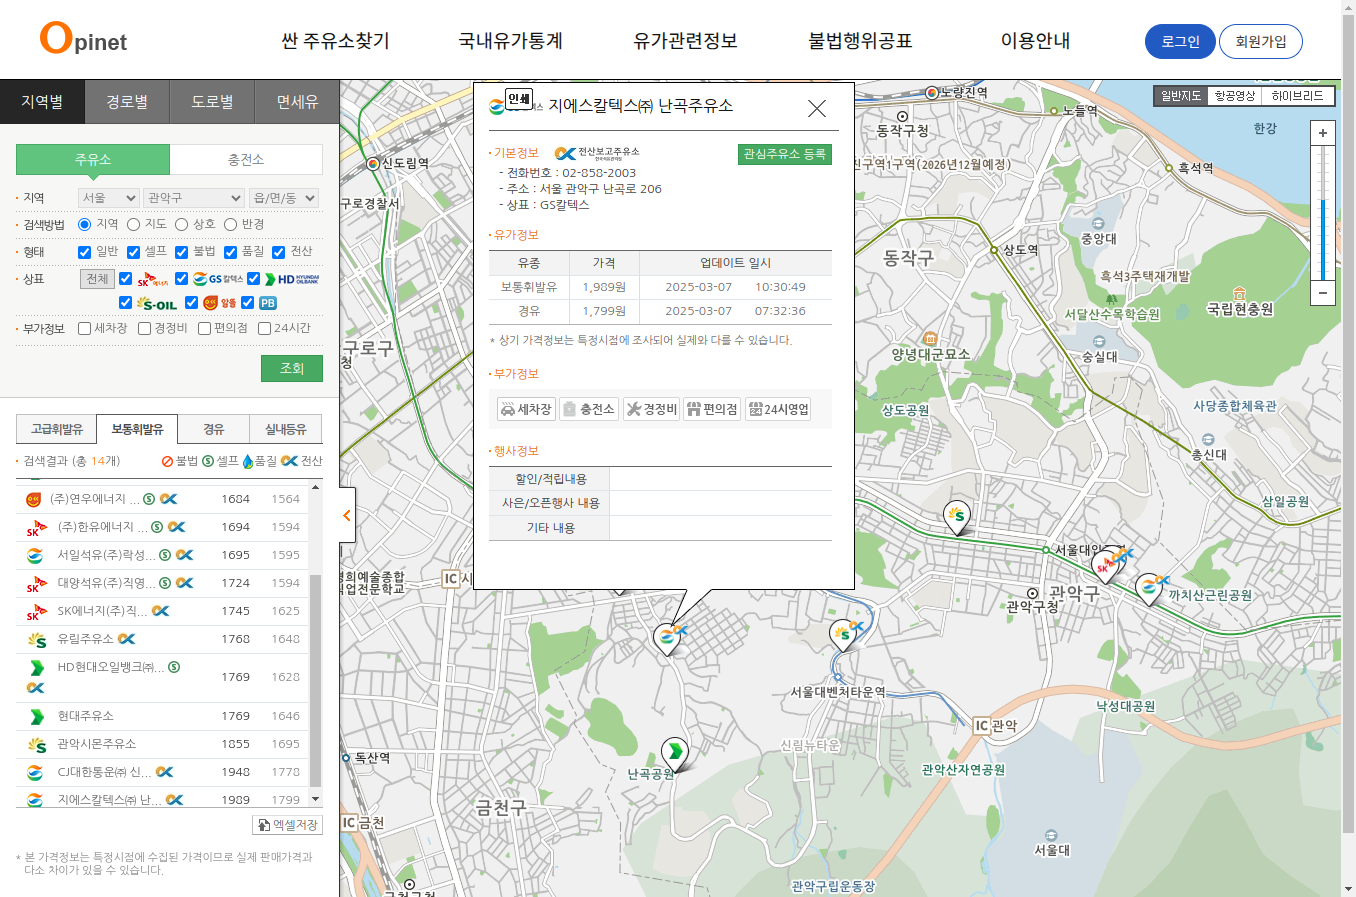

In [12]:
from PIL import Image
import io

screenshot = driver.get_screenshot_as_png()
screenshot_image = Image.open(io.BytesIO(screenshot))

# 스크린샷 저장
screenshot_image.save("screenshot.png")

screenshot_image

### 모든 유종을 선택한 후 정보 추출하는 함수(한 유종만 파는 주유소가 있을 가능성을 고려)

In [6]:
def get_gas_info_list():
    gas_info_list = []
    driver.find_element(By.ID, "os_layer1").click()
    time.sleep(1)
    gas_info_list.append(get_gas_info("body2"))
    driver.find_element(By.ID, "os_layer2").click()
    time.sleep(1)
    gas_info_list.append(get_gas_info("body1"))
    driver.find_element(By.ID, "os_layer3").click()
    time.sleep(1)
    gas_info_list.append(get_gas_info("body3"))
    driver.find_element(By.ID, "os_layer4").click()
    time.sleep(1)
    gas_info_list.append(get_gas_info("body4"))
    return gas_info_list



### 여러 종류를 동시에 파는 주유소가 있기 때문에 병합 후 중복되는 행을 제거해야 함

In [179]:
import pandas as pd
import json

df0 = pd.DataFrame(gas_info_list[0])
df1 = pd.DataFrame(gas_info_list[1]) 
df2 = pd.DataFrame(gas_info_list[2])
df3 = pd.DataFrame(gas_info_list[3])

df = pd.concat([df0, df1, df2, df3], axis=0)
# 딕셔너리 타입의 열 처리하기
for col in df.columns:
    # 해당 열에 딕셔너리 타입의 값이 있는지 확인
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        # 딕셔너리를 JSON 문자열로 변환
        df[col] = df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

# 이제 중복 제거 가능
df = df.drop_duplicates()
df = df.reset_index(drop=True)
# 필요하다면 JSON 문자열을 다시 딕셔너리로 변환
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str) and x.startswith('{')).any():
        df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('{') else x)

df

,상표,주유소명,주소,유종별 가격,부가정보
0,HD현대오일뱅크,㈜CW창원,서울 관악구 과천대로 921 (남현동),"{'고급휘발유': '1,885원', '보통휘발유': '1,649원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ..."
1,GS칼텍스,서일석유(주)락성주유소,서울 관악구 남부순환로 1920 (봉천동),"{'고급휘발유': '1,895원', '보통휘발유': '1,695원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ..."
2,SK에너지,SK에너지(주)직영 신봉천주유소,서울 관악구 남부순환로 1880 (봉천동),"{'고급휘발유': '1,905원', '보통휘발유': '1,745원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ..."
3,SK에너지,(주)한유에너지 행운주유소,서울 관악구 남부순환로 1883 (봉천동),"{'고급휘발유': '1,994원', '보통휘발유': '1,694원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ..."
4,HD현대오일뱅크,HD현대오일뱅크㈜직영 관악셀프주유소,서울 관악구 남부순환로 1520 (신림동),"{'고급휘발유': '2,029원', '보통휘발유': '1,769원', '경유': '...","{'세차장 여부': 'N', '충전소 여부': 'N', '경정비 여부': 'N', ..."
5,GS칼텍스,CJ대한통운㈜ 신림주유소,서울 관악구 남부순환로 1515 (신림동),"{'고급휘발유': '2,099원', '보통휘발유': '1,948원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ..."
6,HD현대오일뱅크,진우7주유소 ㈜준우에너지,서울 관악구 보라매로 41,"{'보통휘발유': '1,684원', '경유': '1,564원'}","{'세차장 여부': 'N', '충전소 여부': 'N', '경정비 여부': 'N', ..."
7,알뜰주유소,(주)연우에너지 신관주유소,서울 관악구 신림로 290 (신림동),"{'보통휘발유': '1,684원', '경유': '1,564원', '실내등유': '1...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ..."
8,SK에너지,대양석유(주)직영 보라매주유소,서울 관악구 보라매로 26 (봉천동),"{'보통휘발유': '1,724원', '경유': '1,594원'}","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ..."
9,S-OIL,유림주유소,서울 관악구 신림로 176 (신림동),"{'보통휘발유': '1,768원', '경유': '1,648원', '실내등유': '1...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ..."


### 모든 유종을 순환하는 것이기에 작업량이 매우 많다. 한 유종당 100번 이상의 탐색이 필요한 경우가 있음. 25개의 지역을 모두 순환하기 위해 멀티쓰레딩 사용

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import json
import threading
import os
from tqdm.notebook import tqdm

# 쓰레드 함수 정의
def process_gas_info(thread_id, sigungu_list_chunk):
    # 각 쓰레드별 결과 저장 리스트
    thread_gas_info_list = []
    
    # 각 쓰레드별 웹드라이버 초기화
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome(service=Service("/home/koo4802/dev_ws/eda/driver/chromedriver"))
    driver.set_window_size(1400, 1080)
    
    for _ in range(2):
        driver.get(url)
        time.sleep(1)
    
    # 서울시 선택 (서울시 value는 "01"입니다)
    sido_btn = driver.find_element(By.ID, "SIDO_NM0")
    sido_option = sido_btn.find_elements(By.TAG_NAME, "option")
    sido_list = [value for option in sido_option if len(value := option.get_attribute("value"))>0]
    sido_btn.send_keys(sido_list[0])  # 서울시 선택
    time.sleep(1)
    
    # 각 시군구별로 처리
    for sigungu in tqdm(sigungu_list_chunk, desc=f"Thread {thread_id}"):
        # 시군구 선택
        sigungu_btn = driver.find_element(By.ID, "SIGUNGU_NM0")
        sigungu_btn.send_keys(sigungu)
        driver.implicitly_wait(3)
        driver.refresh()
        time.sleep(1)
        
        # 레이어와 바디 ID 정의
        layer_ids = ["os_layer1", "os_layer2", "os_layer3", "os_layer4"]
        body_ids = ["body2", "body1", "body3", "body4"]
        
        # 각 레이어 처리
        for layer_id, body_id in zip(layer_ids, body_ids):
            tab_btn = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.ID, layer_id))
            )
            tab_btn.find_element(By.TAG_NAME, "a").click()
            
            # 가스 정보 수집
            try:
                body_element = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.ID, body_id))
                )
                a_list = body_element.find_elements(By.TAG_NAME, "a")
                for a in a_list:
                    a.click()
                    time.sleep(1)
                    mini_window = WebDriverWait(driver, 10).until(
                                EC.presence_of_element_located((By.ID, "os_dtail_info"))
                            )
                    firm_title = mini_window.find_element(By.ID, "poll_div_nm").text
                    gas_title = mini_window.find_element(By.ID, "os_nm").text
                    address = mini_window.find_element(By.ID, "rd_addr").text
                    cost_info = mini_window.find_element(By.ID, "infoTbody").text
                    gas_info = {
                        "상표": firm_title,
                        "주유소명": gas_title,
                        "주소": address,
                        "시군구": sigungu,
                        "유종별 가격": {},
                        "부가정보": {}
                    }
                    lines = cost_info.split("\n")
                    gas_price = {}
                    for line in lines:
                        gas_price[line.split(" ")[0]] = line.split(" ")[1]
                    gas_info["유종별 가격"] = gas_price
                    time.sleep(1)
                    detail_ids = ["cwsh_yn", "lpg_yn", "maint_yn", "cvs_yn", "sel24_yn"]
                    detail_keys = ["세차장 여부", "충전소 여부", "경정비 여부", "편의점 여부", "24시 영업 여부"]
                    detail_info = {}
                    for idx, id in enumerate(detail_ids):
                        src_value = driver.find_element(By.ID, id).get_attribute("src")
                        if "off" in src_value:
                            detail_info[detail_keys[idx]] = "N"
                        else:
                            detail_info[detail_keys[idx]] = "Y"
                    gas_info["부가정보"] = detail_info
                    thread_gas_info_list.append(gas_info)
            except Exception as e:
                print(f"Error in Thread {thread_id} - {sigungu} - {layer_id} {e}")
                continue
    
    driver.quit()
    return thread_gas_info_list

def main():
    # 먼저 시도/시군구 목록 가져오기
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service("/home/koo4802/dev_ws/eda/driver/chromedriver"),
                              options=options)
    url = "https://www.opinet.co.kr/searRgSelect.do"
    for _ in range(2):
        driver.get(url)
        time.sleep(1)
        
    # 서울시 선택 (서울시 value는 "01"입니다)
    sido_btn = driver.find_element(By.ID, "SIDO_NM0")
    sido_option = sido_btn.find_elements(By.TAG_NAME, "option")
    sido_list = [value for option in sido_option if len(value := option.get_attribute("value"))>0]
    sido_btn.send_keys(sido_list[0])  # 서울시 선택
    time.sleep(1)
    
    # 시군구 목록 가져오기
    sigungu_btn = driver.find_element(By.ID, "SIGUNGU_NM0")
    sigungu_option = sigungu_btn.find_elements(By.TAG_NAME, "option")
    sigungu_list = [value for option in sigungu_option if len(value := option.get_attribute("value"))>0]
    
    driver.quit()
    
    # 5개 쓰레드로 작업 분배
    num_threads = 5
    chunk_size = len(sigungu_list) // num_threads
    if len(sigungu_list) % num_threads != 0:
        chunk_size += 1
    
    sigungu_chunks = [sigungu_list[i:i+chunk_size] for i in range(0, len(sigungu_list), chunk_size)]
    # 필요한 경우 빈 청크 추가 (쓰레드 수보다 시군구 수가 적을 경우)
    while len(sigungu_chunks) < num_threads:
        sigungu_chunks.append([])
    
    # 쓰레드 생성 및 실행
    threads = []
    results = [None] * num_threads
    
    for i in range(num_threads):
        if sigungu_chunks[i]:  # 작업이 있는 쓰레드만 실행
            thread = threading.Thread(
                target=lambda idx, chunk: results.__setitem__(idx, process_gas_info(idx+1, chunk)),
                args=(i, sigungu_chunks[i])
            )
            threads.append(thread)
            thread.start()
    
    # 모든 쓰레드가 완료될 때까지 대기
    for thread in threads:
        thread.join()
    
    # 결과 합치기
    all_gas_info = []
    for result in results:
        if result:
            all_gas_info.extend(result)
    
    # 데이터프레임 생성 및 처리
    df = pd.DataFrame(all_gas_info)
    
    # 딕셔너리 타입의 열 처리하기
    for col in df.columns:
        # 해당 열에 딕셔너리 타입의 값이 있는지 확인
        if df[col].apply(lambda x: isinstance(x, dict)).any():
            # 딕셔너리를 JSON 문자열로 변환
            df[col] = df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)
    
    # 중복 제거
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    
    # JSON 문자열을 다시 딕셔너리로 변환
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, str) and x.startswith('{')).any():
            df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('{') else x)
    
    # 결과 저장 또는 반환
    print(f"총 {len(df)}개의 주유소 정보를 수집했습니다.")
    return df

if __name__ == "__main__":
    df = main()
    # 필요하다면 CSV 파일로 저장
    df.to_csv("/home/koo4802/dev_ws/eda/data/gas_stations.csv", index=False)

Thread 2:   0%|          | 0/5 [00:00<?, ?it/s]

Thread 1:   0%|          | 0/5 [00:00<?, ?it/s]

Thread 3:   0%|          | 0/5 [00:00<?, ?it/s]

Thread 5:   0%|          | 0/5 [00:00<?, ?it/s]

Thread 4:   0%|          | 0/5 [00:00<?, ?it/s]

총 422개의 주유소 정보를 수집했습니다.


### 중복 제거 후 422개는 엑셀로 확인한 전체 주유소 숫자와 동일하다

In [15]:
df.head()

,상표,주유소명,주소,시군구,유종별 가격,부가정보
0,HD현대오일뱅크,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718,강남구,"{'고급휘발유': '1,899원', '보통휘발유': '1,739원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ..."
1,SK에너지,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),강남구,"{'고급휘발유': '1,899원', '보통휘발유': '1,739원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ..."
2,HD현대오일뱅크,HD현대오일뱅크㈜직영 강남셀프주유소,서울 강남구 도곡로 208,강남구,"{'고급휘발유': '1,899원', '보통휘발유': '1,719원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ..."
3,HD현대오일뱅크,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),강남구,"{'고급휘발유': '1,914원', '보통휘발유': '1,749원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ..."
4,GS칼텍스,지에스칼텍스㈜ 은마주유소,서울 강남구 영동대로 235,강남구,"{'고급휘발유': '1,919원', '보통휘발유': '1,719원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ..."


In [32]:
df.drop(columns=['price_dict'], inplace=True)

In [9]:
import pandas as pd
df = pd.read_csv("/home/koo4802/dev_ws/eda/data/gas_stations.csv")

### 모든 데이터가 잘 추출되었으므로 분석을 진행한다.

먼저, 현재 유종별 가격은 딕셔너리 타입이므로 이를 해제해야 한다. 또한 원이 붙어있는 문자열을 숫자로 변환해야 한다.

In [10]:
# 원이 붙은 문자열을 숫자로 변환하기 위해 regular expression을 사용한다.
import re
# 모든 유종의 가격을 한 번에 추출하는 함수
def extract_all_fuel_prices(price_str):
    result = {}
    fuel_types = ['고급휘발유', '보통휘발유', '경유', '실내등유']
    
    # None인 경우 모든 유종의 가격을 None으로 설정
    if pd.isna(price_str):
        return {fuel: None for fuel in fuel_types}
    
    # 각 유종별 가격을 추출(regular expression 사용)
    for fuel_type in fuel_types:
        pattern = f"'{fuel_type}': '([0-9,]+)원'"
        match = re.search(pattern, price_str)
        if match:
            result[fuel_type] = int(match.group(1).replace(',', ''))
        else:
            result[fuel_type] = None
    # 추출된 가격을 딕셔너리로 반환
    return result

# 각 행을 순회하면서 유종별 가격을 추출한다.
price_data = df['유종별 가격'].apply(extract_all_fuel_prices)

# 결과를 개별 열로 분리
for fuel_type in ['고급휘발유', '보통휘발유', '경유', '실내등유']:
    df[fuel_type] = price_data.apply(lambda x: x.get(fuel_type))
df

,상표,주유소명,주소,시군구,유종별 가격,부가정보,고급휘발유,보통휘발유,경유,실내등유
0,HD현대오일뱅크,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718,강남구,"{'고급휘발유': '1,899원', '보통휘발유': '1,739원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ...",1899.0,1739,1649,NaN
1,SK에너지,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),강남구,"{'고급휘발유': '1,899원', '보통휘발유': '1,739원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ...",1899.0,1739,1638,NaN
2,HD현대오일뱅크,HD현대오일뱅크㈜직영 강남셀프주유소,서울 강남구 도곡로 208,강남구,"{'고급휘발유': '1,899원', '보통휘발유': '1,719원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ...",1899.0,1719,1638,NaN
3,HD현대오일뱅크,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),강남구,"{'고급휘발유': '1,914원', '보통휘발유': '1,749원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ...",1914.0,1749,1664,1640.0
4,GS칼텍스,지에스칼텍스㈜ 은마주유소,서울 강남구 영동대로 235,강남구,"{'고급휘발유': '1,919원', '보통휘발유': '1,719원', '경유': '...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ...",1919.0,1719,1699,NaN
...,...,...,...,...,...,...,...,...,...,...
417,S-OIL,오천만주유소,서울 중랑구 동일로 547 (면목동),중랑구,"{'보통휘발유': '1,657원', '경유': '1,527원'}","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ...",NaN,1657,1527,NaN
418,S-OIL,범아주유소,서울 중랑구 동일로 881,중랑구,"{'보통휘발유': '1,729원', '경유': '1,589원', '실내등유': '1...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'Y', ...",NaN,1729,1589,1600.0
419,SK에너지,신내주유소,서울 중랑구 용마산로 705 (신내동),중랑구,"{'보통휘발유': '1,739원', '경유': '1,598원', '실내등유': '1...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ...",NaN,1739,1598,1500.0
420,SK에너지,용마로주유소,서울 중랑구 용마산로 309 (면목동),중랑구,"{'보통휘발유': '1,758원', '경유': '1,658원', '실내등유': '1...","{'세차장 여부': 'Y', '충전소 여부': 'N', '경정비 여부': 'N', ...",NaN,1758,1658,1600.0


### 구별로 주유소 수를 유종별로 확인해보자

아래에서 모든 유종의 주유소 수를 확인할 수 있다.

In [11]:
gas_station_count_list = [df[df[oil_type].notna()].groupby('시군구')[oil_type].count().sort_values(ascending=False) for oil_type in ['고급휘발유', '보통휘발유', '경유', '실내등유']]
gas_station_count_list

[시군구
 강남구     26
 서초구     26
 송파구     17
 강서구     16
 영등포구    16
 성북구     13
 성동구     12
 용산구     12
 구로구     10
 양천구      9
 종로구      8
 중구       8
 은평구      8
 강동구      8
 광진구      8
 마포구      7
 노원구      7
 서대문구     7
 동작구      6
 관악구      6
 금천구      6
 동대문구     5
 도봉구      5
 강북구      4
 중랑구      4
 Name: 고급휘발유, dtype: int64,
 시군구
 강서구     33
 서초구     31
 강남구     30
 송파구     28
 영등포구    26
 양천구     24
 성북구     23
 구로구     18
 성동구     16
 은평구     15
 동대문구    15
 관악구     14
 노원구     14
 서대문구    13
 도봉구     13
 강동구     13
 광진구     13
 중랑구     12
 마포구     12
 용산구     12
 금천구     11
 강북구     10
 동작구      9
 중구       9
 종로구      8
 Name: 보통휘발유, dtype: int64,
 시군구
 강서구     33
 서초구     31
 강남구     30
 송파구     28
 영등포구    26
 양천구     24
 성북구     23
 구로구     18
 성동구     16
 은평구     15
 동대문구    15
 관악구     14
 노원구     14
 서대문구    13
 도봉구     13
 강동구     13
 광진구     13
 중랑구     12
 마포구     12
 용산구     12
 금천구     11
 강북구     10
 동작구      9
 중구       9
 종로구      8
 Name: 경유, dtype: int64,
 시군구

### 지도에 적용해보자 create_fuel_map의 인풋을 바꿔주면 다른 유종의 지도도 볼 수 있다.

In [12]:
import folium
import json

geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

# 지도 생성 함수
def create_fuel_map(fuel_type):
    # 해당 유종 인덱스 찾기
    fuel_index = ['고급휘발유', '보통휘발유', '경유', '실내등유'].index(fuel_type)
    data = gas_station_count_list[fuel_index]
    
    # 지도 생성
    m = folium.Map(location=[37.5502, 126.982], zoom_start=9.5)
    
    # 색상맵 추가
    folium.Choropleth(
        geo_data=geo_str,
        data=data,
        columns=[data.index, fuel_type],
        key_on="feature.id",
        fill_color="PuRd",
        legend_name=f"{fuel_type} 판매 주유소 수"
    ).add_to(m)
    
    return m

# 사용 예시
fuel_type = ['고급휘발유', '보통휘발유', '경유', '실내등유']
create_fuel_map(fuel_type[3])#3번은 실내등유


한계점은 상대 숫자를 고려하지 않았다는 것이다. 주유소가 많은 지역의 경우는 실내등유나 고급휘발유를 판매하는 주유소의 숫자도 많을 확률이 높다. 하지만 전체 주유소 숫자와 보통휘발유, 경유를 판매하는 주유소 숫자가 동일하기 때문에(모든 주유소는 보통휘발유와 경유를 취급한다), 간접적으로 상대 숫자를 고려할 수 있다.

특이하게 전체 주유소 숫자는 적지만 실내등유까지 파는 주유소는 많은 금천구와 강동구 등의 상황을 확인할 수 있었다.

### 기름 가격이 저렴한 상위 10% 주유소의 분포 확인

In [13]:
sorted_stations = df.sort_values(by='보통휘발유', ascending=True)
top_10_percent = sorted_stations.head(int(len(sorted_stations) * 0.1))
top_10_percent = top_10_percent.groupby('시군구')['보통휘발유'].count().sort_values(ascending=False)

folium 맵으로 표현

In [15]:
import folium
import json
map = folium.Map(location=[37.5502, 126.982], zoom_start=9.5)
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))
folium.Choropleth(
    geo_data=geo_str,
    data=top_10_percent,
    columns=['시군구', '보통휘발유'],
    key_on="feature.id",
    fill_color="PuRd",
    legend_name="보통휘발유 가격 순위").add_to(map)
map


아이러니하게도 주유소가 많은 중심 지역은 가격이 낮은 주유소가 없었다

In [18]:
create_fuel_map('보통휘발유')#중심 지역의 주유소 분포를 보기 위함